# E-commerce Customer Segmentation

### Abstract:
A key challenge for e-commerce businesses is to analyze the trend in the
market to increase their sales. The trend can be easily observed if the companies can group the customers; based on their activity on the e- commerce site. This grouping can be done by applying different criteria like previous orders, mostly searched brands and so on.


### Problem Statement:
Given the e-commerce data, use k-means clustering algorithm to cluster customers with similar interest.
### Dataset Information:
The data was collected from a well known e-commerce website over a period of time based on the customer’s search profile.
#### Input variables:

1) Cust_ID Unique numbering for customers

2) Gender: Gender of the customer

3) Orders: Number of orders placed by each customer in the past

Remaining 35 features contains the number of times customers have searched them

### Importing Libraries

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [41]:
df=pd.read_excel('cust_data.xlsx')
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


### Data Analysis and Preparation
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and perform the following tasks:

1. Check data types. Ensure your data types are correct.
2. We need to change the data types as per requirement If they are not as per business definition
3. Go through the summary statistics
4. Distribution of variables
5. Study the correlation
6. Detect outliers from the data
7. Look for the missing values

### Understanding the dataset

In [42]:
df1=df.copy()
df1.shape

(30000, 38)

In [43]:
df1.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

### Checking Data Types

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [45]:
df1.dtypes.value_counts()

int64     37
object     1
dtype: int64

<b> 1. For getting the statistical summary of numerical variables we use the describe()

In [46]:
df1.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


- The above output displays the summary statistics of all the numeric variables like mean, median, standard deviation, minimum, and the maximum values, the first and third quantiles.

- We can see that the orders ranges from 0 to 12, with mean 4.16

### Checking for null values and duplicates

In [47]:
df1.duplicated().sum()

0

In [48]:
df1.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [49]:
nv = df1.isnull().sum()
nv[nv>0]

Gender    2724
dtype: int64

In [50]:
df1['Gender'].value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

In [51]:
df1['Gender'].fillna('F',inplace=True)

In [52]:
nv = df1.isnull().sum()
nv[nv>0]

Series([], dtype: int64)

### Analysing data further

In [53]:
df1.iloc[:,3:].sample(20)
# Most Values are 0

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
8428,4,1,1,1,0,0,0,0,0,0,...,0,4,1,0,0,0,1,2,0,0
29629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6951,0,0,0,0,0,0,0,0,0,0,...,0,1,5,0,1,0,0,0,0,0
8478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20631,0,0,6,0,0,0,0,0,0,1,...,0,2,2,2,0,0,0,0,0,0
24176,0,1,1,0,0,0,0,0,0,1,...,0,4,1,1,0,0,3,12,0,1
29916,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3061,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14047,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
20659,0,0,0,4,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [54]:
x=df1.iloc[:,2:]
print(x.columns)
print(x.dtypes.value_counts())

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')
int64    36
dtype: int64


In [55]:
from sklearn.cluster import KMeans

WCSS
 [918493.4414999996, 616586.8209608591, 570367.2782039179, 543069.3432949978, 523273.62281771365, 508018.8046665909, 492527.47254388453, 481787.16852018813, 472445.15798036056, 460679.23208342143, 452551.61198157555, 448656.294863862, 439541.52956661535, 431375.18170109624, 428666.66288624785, 418893.4169417655, 415321.4268147213, 411968.9303253985]


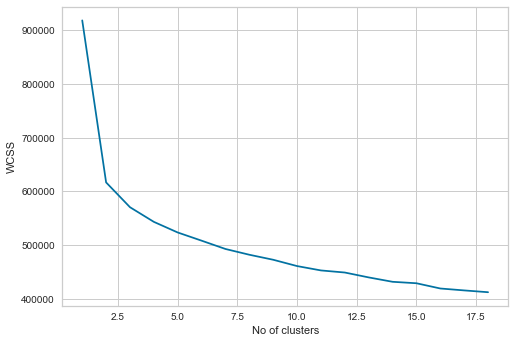

In [56]:
wcss = []
for i in range(1,19): # no of clusters
    m = KMeans(n_clusters=i)
    m.fit(x)
    wcss.append(m.inertia_)

print('WCSS\n',wcss)
plt.plot(list(range(1,19)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
from sklearn.metrics import silhouette_score

In [58]:
for i in range(2,10):
    m=KMeans(n_clusters=i).fit(x)
    print(f'Silhouette Score at K={i}',silhouette_score(x,m.labels_))

Silhouette Score at K=2 0.33837516300865234
Silhouette Score at K=3 0.20313881710635542
Silhouette Score at K=4 0.20196366415793865
Silhouette Score at K=5 0.20487423200568294
Silhouette Score at K=6 0.1512696182065142
Silhouette Score at K=7 0.13301470235312307
Silhouette Score at K=8 0.15286982971217483
Silhouette Score at K=9 0.15313048097546814


- <b> Optimal value at K=2 as silhouette score highest and closest to 1 

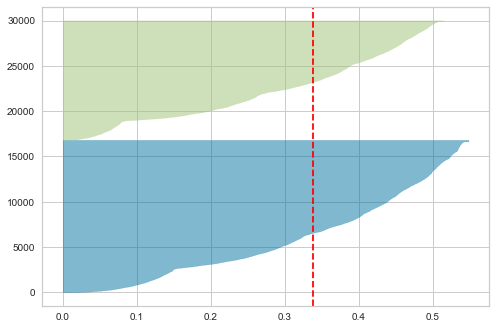

In [59]:
m2=KMeans(n_clusters=2)
visualizer=SilhouetteVisualizer(m2,colors='yellowbrick')
visualizer.fit(x)
plt.show()

In [60]:
from collections import Counter

In [61]:
ypred2=m2.predict(x)
c1=Counter(ypred2)
print(c1)

Counter({0: 16823, 1: 13177})


### Applying KMeans at K=2

In [62]:
k2= KMeans(n_clusters=2)
k2.fit(x)
ypred2=k2.predict(x)
print(ypred2)

[1 0 1 ... 0 0 0]


In [63]:
labels2= k2.labels_
print(labels2)

[1 0 1 ... 0 0 0]


In [64]:
cent2= k2.cluster_centers_
print(cent2)

[[1.36271771 0.25756405 0.23491648 0.21119895 0.1515782  0.13903584
  0.13600428 0.1056292  0.1075908  0.09790168 0.13642038 0.30743625
  0.21440885 0.13564763 0.15692802 0.10794745 0.28330262 0.04559234
  0.72614872 0.2422279  0.46822802 0.25209535 0.1154372  0.0341794
  0.41675088 0.11834988 0.10705582 0.26624264 0.35790287 0.15740355
  0.07769126 0.05861024 0.19021578 0.111514   0.08595375 0.07358973]
 [7.75358579 0.28003339 0.27456933 0.23791455 0.17378766 0.14927525
  0.14457008 0.10859832 0.11633908 0.08962586 0.14487364 0.35470896
  0.20285346 0.1488958  0.16642635 0.10374137 0.32184868 0.05122562
  0.79137892 0.25514153 0.47415952 0.26553844 0.12301738 0.02914169
  0.44243758 0.12514229 0.09675951 0.27737725 0.38559611 0.16096228
  0.07763527 0.05570312 0.19473325 0.12256204 0.09068832 0.06746604]]


In [65]:
df1['Cls2']=ypred2
df1.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cls2
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


### Clustering Result

In [67]:
res=df1.iloc[:,2:].groupby(['Cls2']).mean().T
res

Cls2,0,1
Orders,1.362718,7.753586
Jordan,0.257564,0.280033
Gatorade,0.234916,0.274569
Samsung,0.211199,0.237915
Asus,0.151578,0.173788
Udis,0.139036,0.149275
Mondelez International,0.136004,0.144570
Wrangler,0.105629,0.108598
Vans,0.107591,0.116339
Fila,0.097902,0.089626


### Applying KMeans at K=3

In [68]:
k3= KMeans(n_clusters=3)
k3.fit(x)
ypred3=k3.predict(x)
print(ypred3)

[1 2 1 ... 2 2 0]


In [69]:
labels3= k3.labels_
print(labels3)

[1 2 1 ... 2 2 0]


In [70]:
cent3= k3.cluster_centers_
print(cent3)

[[4.460199   0.28986022 0.28014688 0.24259654 0.17033878 0.14688462
  0.14877991 0.11312485 0.11430941 0.08943378 0.13764511 0.34446814
  0.20540156 0.14759536 0.15944089 0.11134802 0.33605781 0.04821132
  0.78298981 0.24982232 0.49253731 0.27872542 0.11656006 0.03423359
  0.45723762 0.12461502 0.09405354 0.27114428 0.37976783 0.15671642
  0.08505094 0.0599384  0.1939114  0.12579957 0.09251362 0.0721393 ]
 [8.7516433  0.27475898 0.27333479 0.23236196 0.17298422 0.14888256
  0.14198072 0.10714286 0.11667397 0.08851884 0.14986854 0.3568142
  0.20048203 0.14986854 0.16750657 0.10254163 0.31660824 0.05335232
  0.79382121 0.26358457 0.45672656 0.25985977 0.12346626 0.02826468
  0.43525416 0.12642419 0.10122699 0.27662138 0.38748904 0.16180982
  0.07613935 0.05554338 0.19620947 0.11985101 0.09158633 0.06660824]
 [0.60788415 0.2468222  0.21802092 0.20265487 0.1466613  0.13732904
  0.13201931 0.10257442 0.10563154 0.10176991 0.13467418 0.29613837
  0.21850362 0.13113435 0.15752212 0.10514883 0

In [71]:
df1['Cls3']=ypred3
df1.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cls2,Cls3
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,2,F,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,5,F,10,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,1,1


### Clustering Result

In [72]:
res=df1.iloc[:,2:].groupby(['Cls3']).mean().T
res

Cls3,0,1,2
Orders,4.460199,8.751643,0.607884
Jordan,0.289860,0.274759,0.246822
Gatorade,0.280147,0.273335,0.218021
Samsung,0.242597,0.232362,0.202655
Asus,0.170339,0.172984,0.146661
Udis,0.146885,0.148883,0.137329
Mondelez International,0.148780,0.141981,0.132019
Wrangler,0.113125,0.107143,0.102574
Vans,0.114309,0.116674,0.105632
Fila,0.089434,0.088519,0.101770


### Applying KMeans at K=4

In [73]:
k4= KMeans(n_clusters=4)
k4.fit(x)
ypred4=k4.predict(x)
print(ypred4)

[0 3 0 ... 2 2 1]


In [74]:
labels4= k4.labels_
print(labels4)

[0 3 0 ... 2 2 1]


In [75]:
cent4= k4.cluster_centers_
print(cent4)

[[8.75758249 0.26797023 0.26741473 0.22997445 0.16931452 0.14553938
  0.13976225 0.10498833 0.11298745 0.08732363 0.14242862 0.34573936
  0.15431619 0.1442062  0.1625375  0.08432396 0.29641151 0.05099433
  0.74713921 0.24275081 0.42128652 0.25652705 0.11409843 0.02566382
  0.37473614 0.12309743 0.09176758 0.26919231 0.38140207 0.15220531
  0.07332519 0.05321631 0.1805355  0.11165426 0.08532385 0.05843795]
 [4.46534898 0.27189623 0.26460778 0.23767758 0.16491662 0.1446572
  0.1428042  0.10747375 0.10574429 0.08733786 0.12180358 0.31698579
  0.12526251 0.13773935 0.15219271 0.07263743 0.29005559 0.0448425
  0.68437307 0.21655343 0.40543545 0.26176652 0.10673255 0.03224212
  0.32995676 0.1162446  0.07399629 0.25435454 0.36368128 0.13428042
  0.07844348 0.05620754 0.16454602 0.10982088 0.07621989 0.0557134 ]
 [0.6015144  0.23090364 0.20519221 0.19495756 0.1396239  0.13313363
  0.12522882 0.09677151 0.09727076 0.09777001 0.11998669 0.27533699
  0.1278915  0.11757364 0.15293726 0.06914628 0.

In [76]:
df1['Cls4']=ypred4
df1.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cls2,Cls3,Cls4
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,2,F,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
4,5,F,10,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0


### Clustering Result

In [82]:
res=df1.iloc[:,2:].groupby(['Cls4']).mean().T
res

Cls4,0,1,2,3
Orders,8.757582,4.465349,0.601564,3.259301
Jordan,0.267970,0.271896,0.230923,0.715896
Gatorade,0.267415,0.264608,0.205126,0.626832
Samsung,0.229974,0.237678,0.194974,0.395716
Asus,0.169315,0.164917,0.139636,0.341601
Udis,0.145539,0.144657,0.133145,0.253664
Mondelez International,0.139762,0.142804,0.125239,0.308906
Wrangler,0.104988,0.107474,0.096780,0.259301
Vans,0.112987,0.105744,0.097279,0.339346
Fila,0.087324,0.087338,0.097778,0.180383
